# Example 5.11 (Control of robotic welders-more than $T^2$ needed)

In [1]:
import pathlib
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from MultivariateFunctionsCh5 import MultivariateFunctionsCh5

In [2]:
def load_data() -> pd.DataFrame:
    # Load Welder Data.
    fpth = pathlib.Path(r'..\..\data\Table5.9.xlsx')
    df = pd.read_excel(fpth)
    df['ln(gas flow)'] = np.log(df['Gas flow'])
    return df[['Voltage', 'Current', 'Feed speed', 'ln(gas flow)']]

In [3]:
df = load_data()

In [4]:
X = df.to_numpy()
n, p = X.shape

In [5]:
xbar = np.mean(X, axis=0).reshape(p, 1)
S = np.cov(X.T, ddof=1)

In [6]:
crit01 = scipy.stats.chi2(df=p).ppf(q=1-0.01)
crit05 = scipy.stats.chi2(df=p).ppf(q=1-0.05)

In [7]:
Sinv = np.linalg.inv(S)
stat_dist = lambda x: (x.reshape(1,p) - xbar.T) @ Sinv @ (x.reshape(p,1) - xbar)
dist = np.array([stat_dist(X[i,:]).flatten() for i in range(X.shape[0])])

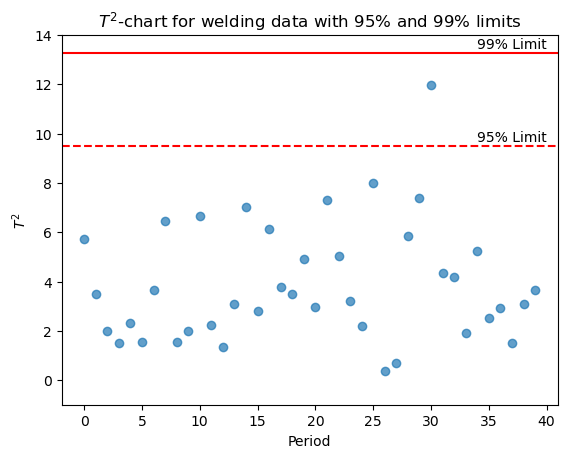

In [8]:
plt.axhline(y=crit05, color='r', linestyle='--')
plt.annotate('99% Limit', xy=(35, crit01), xytext=(34, crit01+.2))
plt.annotate('95% Limit', xy=(35, crit05), xytext=(34, crit05+.2))
plt.axhline(y=crit01, color='r', linestyle='-')
plt.scatter(list(range(dist.shape[0])), dist, alpha=0.70)
plt.ylim([-1, 14])
plt.title(r'$T^{2}$-chart for welding data with 95% and 99% limits')
plt.xlabel('Period')
plt.ylabel('$T^{2}$')
plt.show()

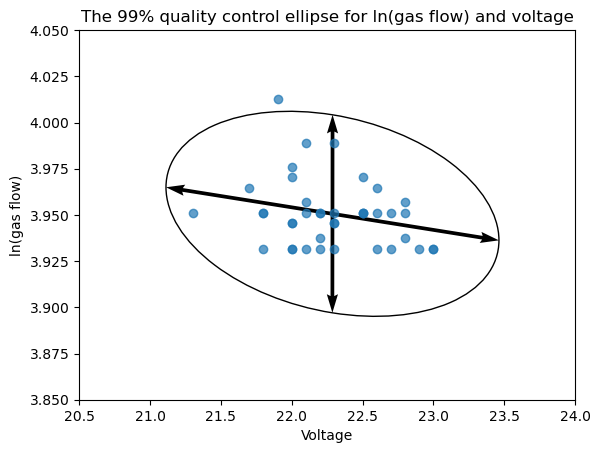

In [9]:
my_plot, ax = MultivariateFunctionsCh5.plot_control_ellipse(
    df[['Voltage', 'ln(gas flow)']], 0.01)
my_plot.scatter(df.Voltage, df['ln(gas flow)'], alpha=0.7)
ax.set_xlim(20.5, 24)
ax.set_ylim(3.85, 4.05)
# ax.set_aspect('equal')
ax.set_title('The 99% quality control ellipse for ln(gas flow) and voltage')
my_plot.xlabel('Voltage')
my_plot.ylabel('ln(gas flow)')
my_plot.show()

In [10]:
# Observation with T^2 value outside the 95% Limit.
df[dist > crit05]

,Voltage,Current,Feed speed,ln(gas flow)
30,21.9,273,288.7,4.012773


In [11]:
cl = xbar[3] + np.array([-1, 1]) * (3 * np.sqrt(S[3,3]))

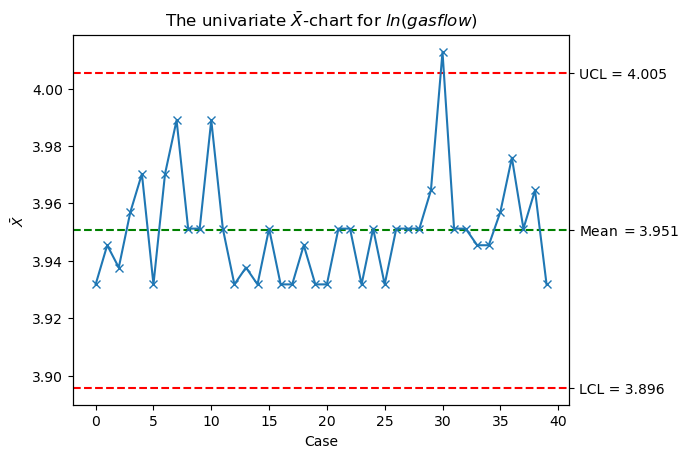

In [12]:
plt.figure()
ax = plt.gca()
plt.axhline(y=cl[0], color='r', linestyle='--')
plt.axhline(y=xbar[3].item(), color='g', linestyle='--')
plt.axhline(y=cl[1], color='r', linestyle='--')
plt.plot(df['ln(gas flow)'], marker='x')
plt.title('The univariate $\\bar{X}$-chart for $ln(gas flow)$')
plt.xlabel('Case')
plt.ylabel('$\\bar{X}$')
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim()) 
ax2.set_yticks([cl[0], xbar[3].item(), cl[1]])
ax2.set_yticklabels([f'LCL = {cl[0]:.3f}', f'Mean $= {xbar[3].item():.3f}$', f'UCL = {cl[1]:.3f}'])
plt.show()

In [13]:
# Obervation outside the 99% limits.
df[~df['ln(gas flow)'].between(cl[0], cl[1])]

,Voltage,Current,Feed speed,ln(gas flow)
30,21.9,273,288.7,4.012773
